<a href="https://colab.research.google.com/github/Zeynep-Dogan/IE-423/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Client Subscription to a Term Deposit:</font>
### <font color='#475468'> Can you predict subscription in bank clients?</font>

## Initialize

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dfBank = pd.read_csv('/content/drive/MyDrive/ie 423/bank-full_task4.csv')

In [7]:
dfBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
dfBank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Analyze Data

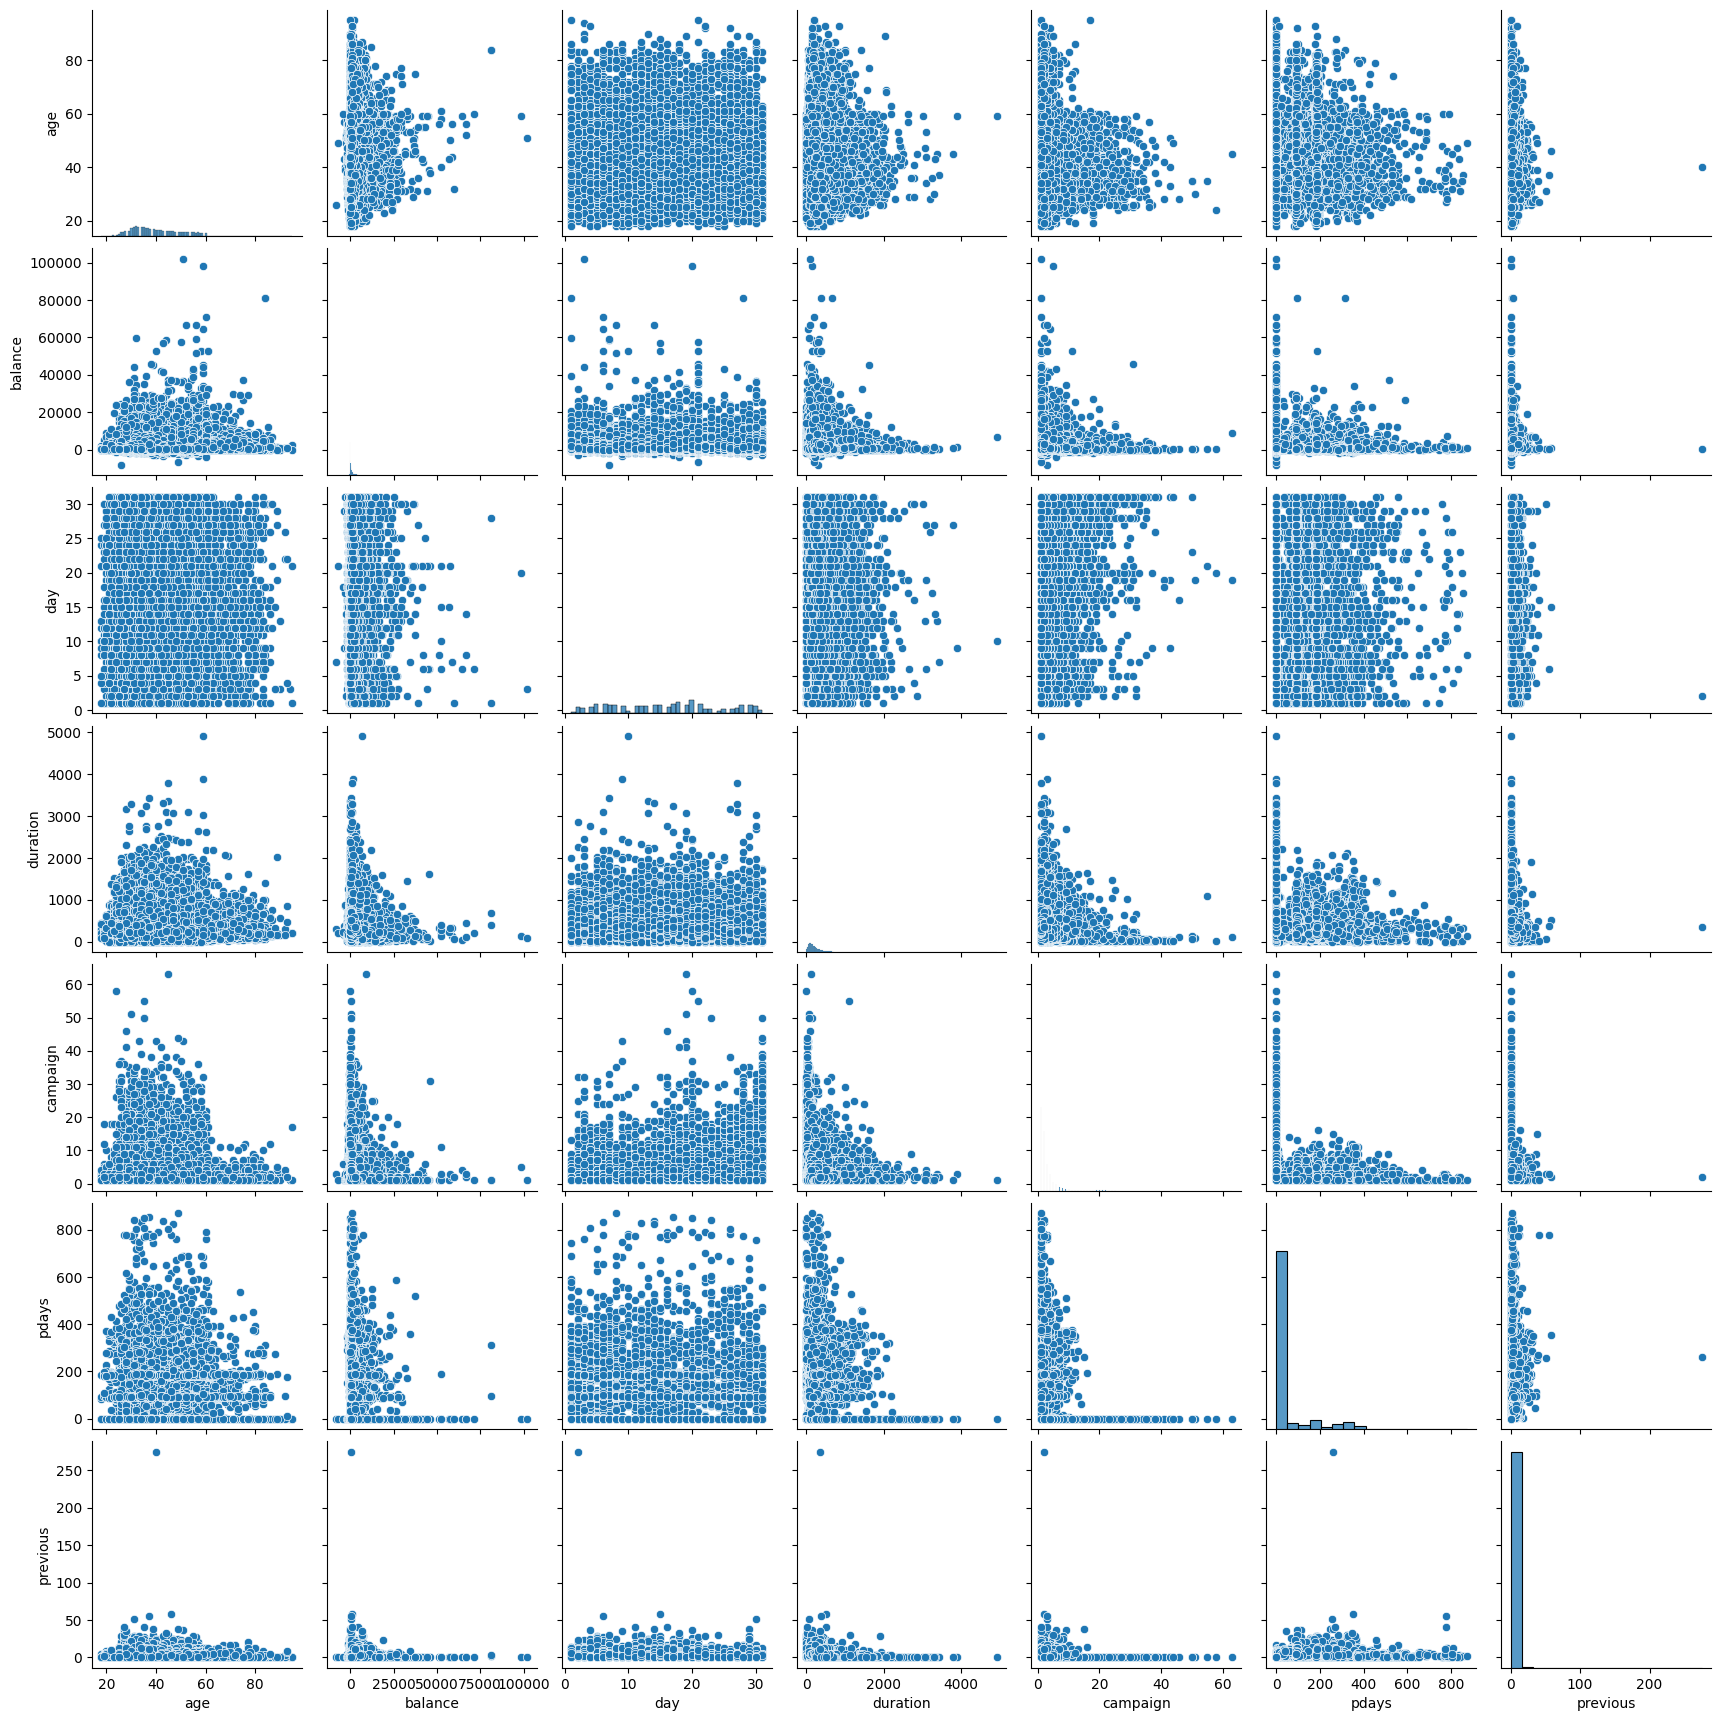

In [8]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfBank)

There doesn't seem to be any significant correlations going on.  Let's split the data into two as categorical and numeric.

# Categorical Data

For the **categorical data** we will check which features are included.

In [18]:
cat = dfBank.select_dtypes(include= object)
cat_features = cat.columns
cat_feature = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

In [19]:
for feature in cat_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(dfBank[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


Now we will visualize this data:

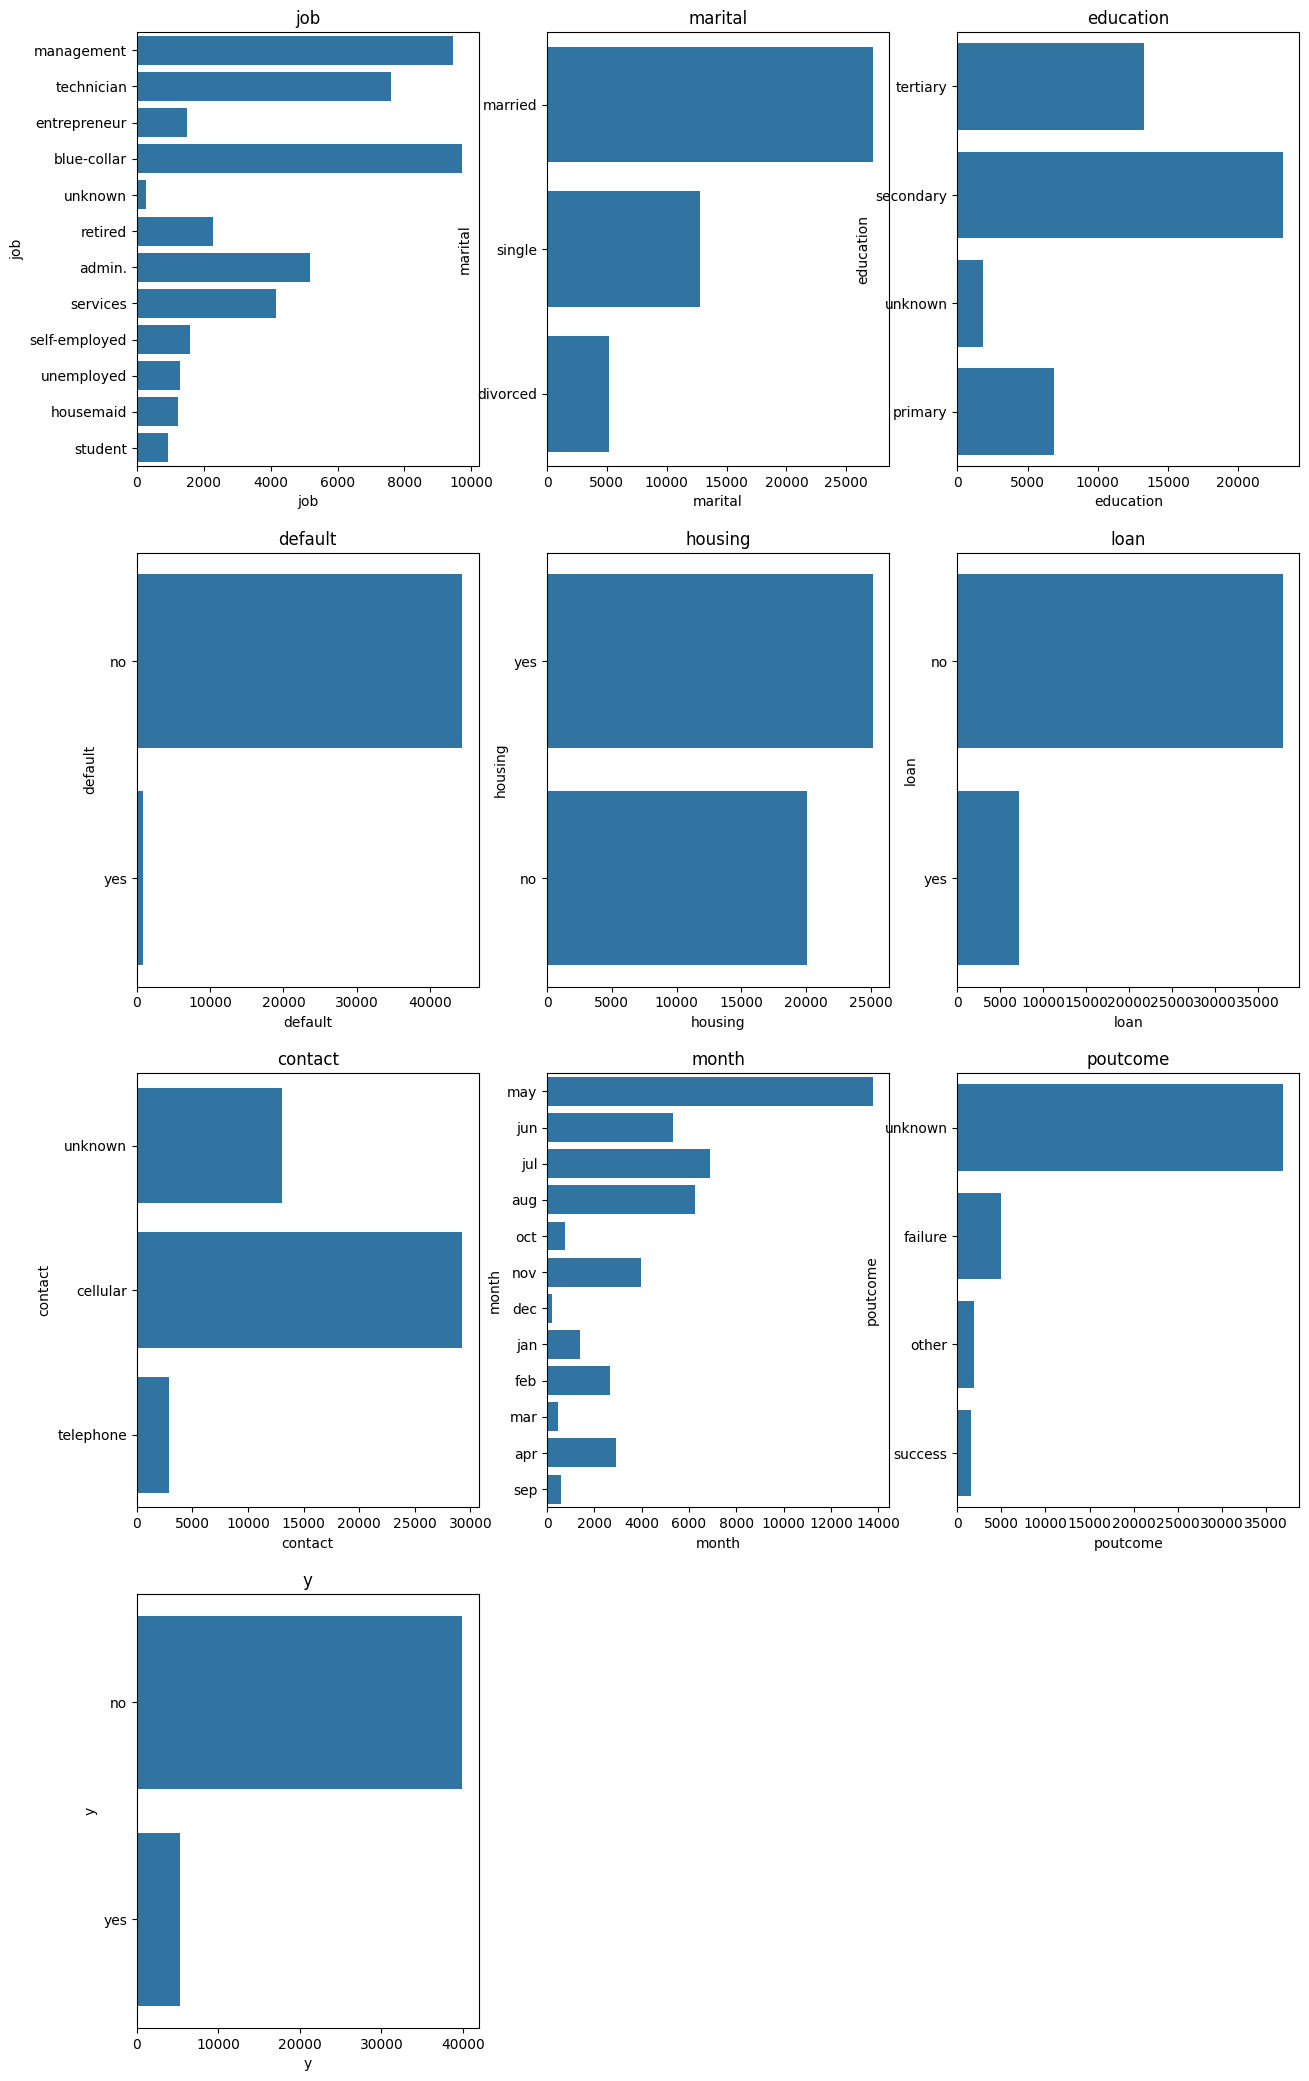

In [20]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_feature in cat_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_feature,data=dfBank)
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    plotnumber+=1
plt.show()

# Numerical Data

In [26]:
numeric = dfBank.select_dtypes(include=np.number)
numeric_columns= numeric.columns
numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [27]:
num_feature = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

(<Axes: xlabel='age', ylabel='duration'>,)

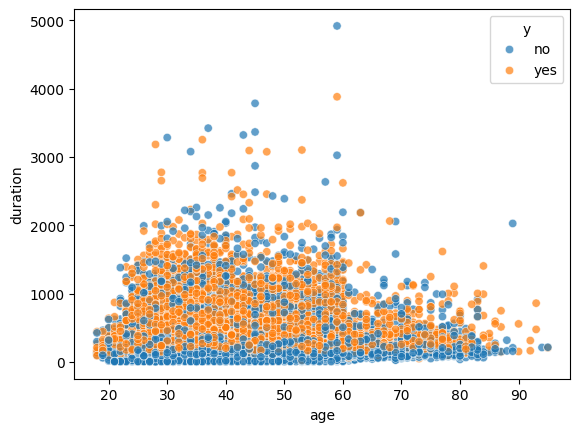

In [30]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfBank['age'], y=dfBank['duration'], hue=dfBank['y'], alpha=0.7),

Notice that the orange points are clustered to the below more than the above? This means that clients with longer duration are more likely to subscribe a term deposit.
However, since 'y' is a categorical feature we need to turn it into a discreate value in order to work with it. So, we will be using 'encoding'.

# Encoding Categorical Data into Numeric Data

In [32]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with non-numeric data
label_encoder = LabelEncoder()
for col in cat_features:
    dfBank[col] = label_encoder.fit_transform(dfBank[col])

# Predict Subscriptions of Clients to a Term Deposit

### Logistic Regression

We will be using Logistic Regression since the 'y' feature is binary now. not be able to use Linear Regression because our target is binary and not continuous. For this, the range is [0,1] and the graph is a S-curve which can take a number between 0 and 1. We decide on a treshold where if the value is bigger than the treshold it take the value 1 and otherwise 0.

In [33]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
y = dfBank['y']
X = scale(dfBank.drop(['y'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [34]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrBank = LogisticRegression(random_state=1)
mdlLgrBank.fit(X_train, y_train)
y_test_pred = mdlLgrBank.predict(X_test)

Since the 'y' value is binary we need to view the model result in a table known as a **Confusion Matrix**.

In [35]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7837  156]
 [ 830  220]]


The below figure show how to calculate precision, recall, and accuracy from the confusion matrix. Also, F-1 Score is the harmonic mean of prcision and recall.

We need to find precision and recall to be able to find the f1-score:

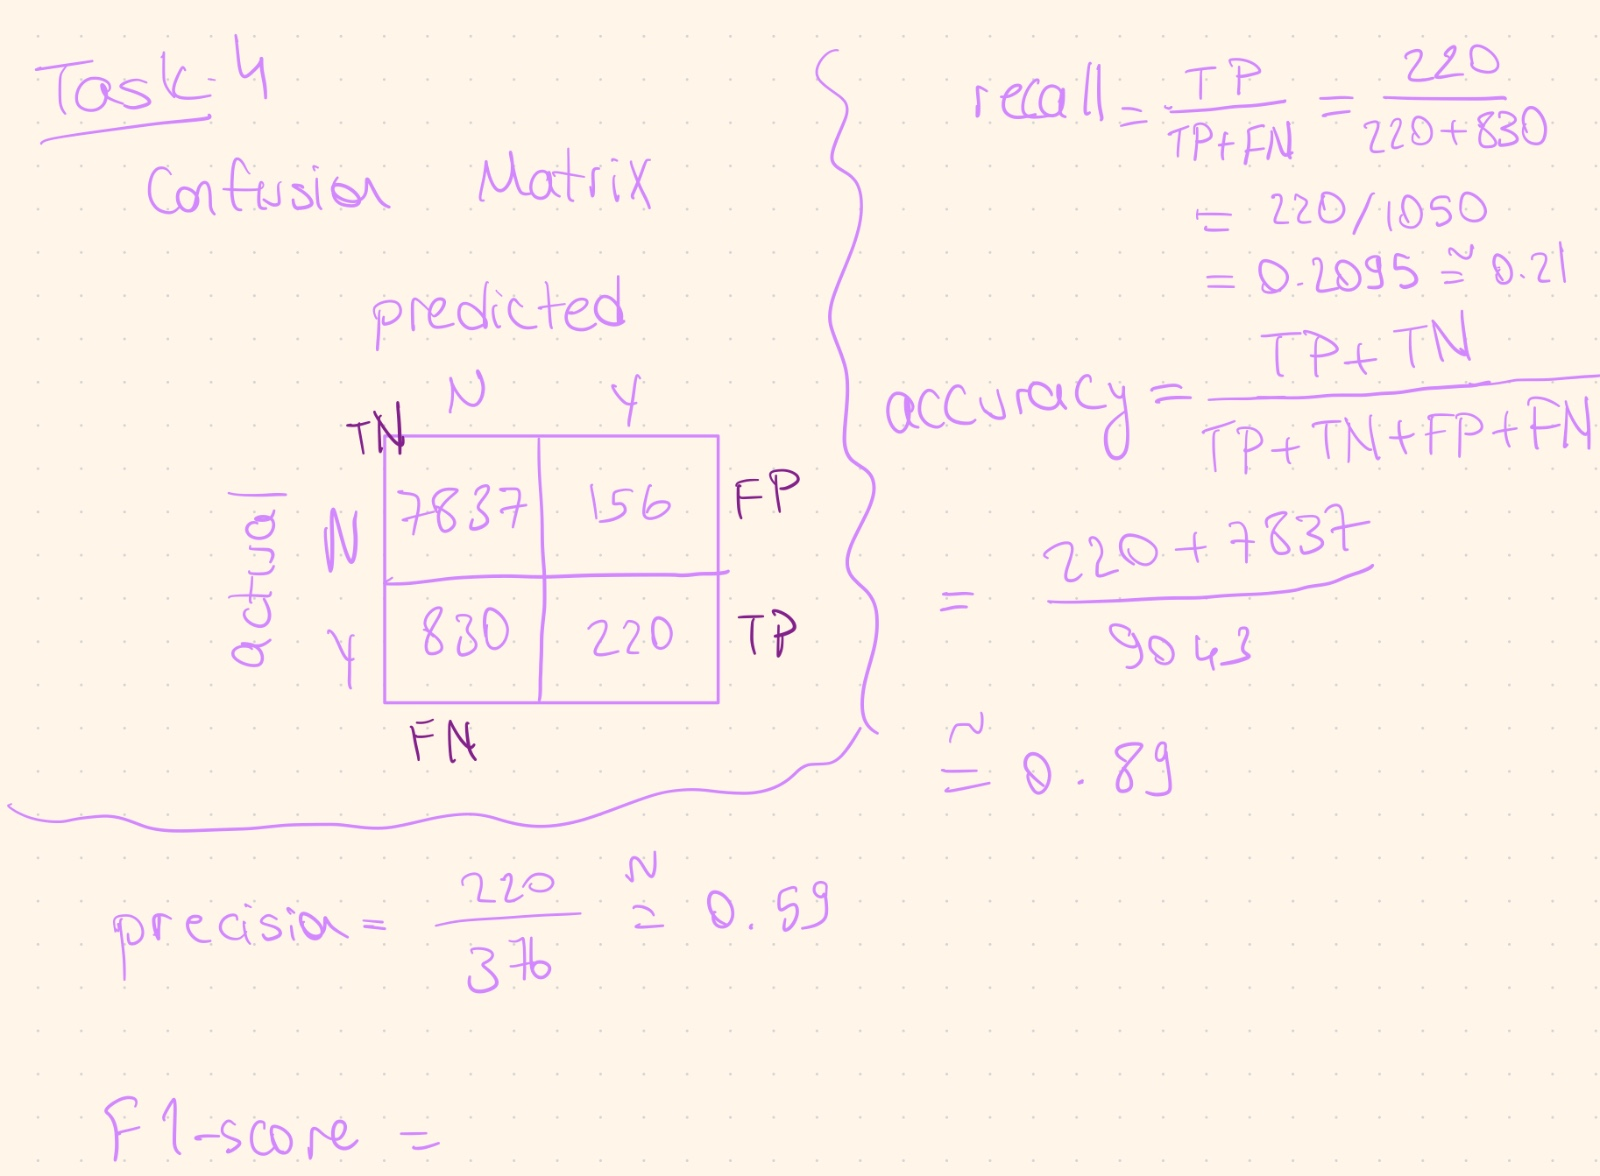

# Metric 1: F1-score

In [36]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.59      0.21      0.31      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.62      9043
weighted avg       0.87      0.89      0.87      9043



This result shows that the calculations are correct!

# Metric 2: ROC AUC Score

To summarize all the performance results into a single number, let's plot the
True Positive Rate (TPR) = TP / (TP + FN) = 220/1050 = 21%
against
False Positive Rate (FPR) = FP / (FP + TN) = 156/7993 = 2%

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

A higher value for the area under this ROC curve, which is **AUC**, signifies a better model.

In [37]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.5950033660405235


Now that we have one working model with acceptable results, let's see if we can improve it by trying out some other models...

utexas_ds_orie_divider_gray.png

# Naive Bayes
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target.

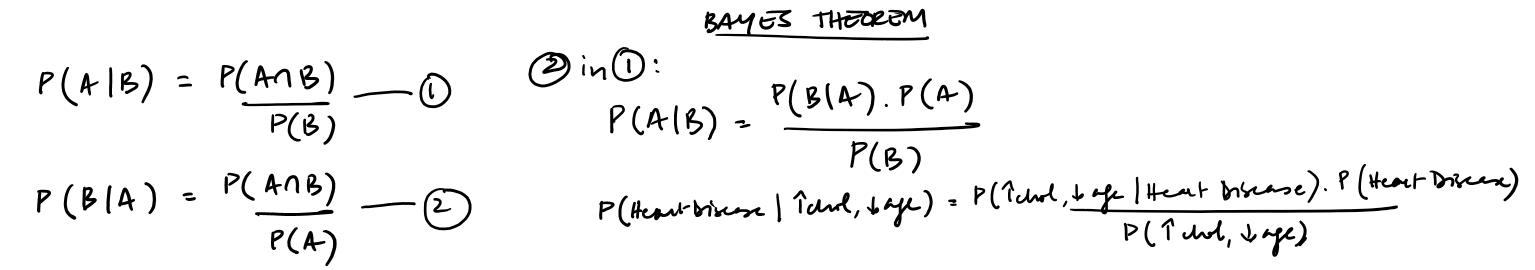

#### Naive Bayes - Gaussian
Since the pairplot showed normally distributed features (along the diagonal), the Gaussian Naive Bayes would be a good model to try...

In [38]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgBank = GaussianNB()
mdlNbgBank.fit(X_train,y_train)
y_test_pred = mdlNbgBank.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7993
           1       0.35      0.49      0.40      1050

    accuracy                           0.83      9043
   macro avg       0.64      0.68      0.65      9043
weighted avg       0.86      0.83      0.85      9043

AUC Score:
0.6827803494724551


The AUC score increases to approx. 0.68.

# K-Nearest Neighbor (KNN)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

In [39]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnBank = KNeighborsClassifier(n_neighbors=10)
mdlKnnBank.fit(X_train, y_train)
y_test_pred = mdlKnnBank.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.6071200395584232


Let's try a different type of classification model before we wrap up...

# Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

In [40]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmBank = SVC()
mdlSvmBank.fit(X_train, y_train)
y_test_pred = mdlSvmBank.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7993
           1       0.67      0.27      0.38      1050

    accuracy                           0.90      9043
   macro avg       0.79      0.62      0.66      9043
weighted avg       0.88      0.90      0.88      9043

AUC Score:
0.6247007798490346


Based on all the above models, it seems like Naive Bayes gives us the best results with an AUC score of approx. 68%.  

utexas_ds_orie_divider_gray.png